In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [ ]:
text = "To be or not to be, that is the question."

In [ ]:
chars = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

In [ ]:
maxlen = 40
step = 3
sequences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sequences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sequences), len(chars)), dtype=bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.01),metrics=["accuracy"])
history = model.fit(x, y, batch_size=128, epochs=100)

In [ ]:
final_loss = history.history['loss'][-1]
print("Final loss:", final_loss)

Accuracy = 2 ** final_loss  # Calculate perplexity
print("Final accuracy (perplexity):", Accuracy)

Final loss: 3.2186455882765586e-06
Final accuracy (perplexity): 1.0000022309976033


In [ ]:
seed_text = "To be or not to be"
generated_text = seed_text

In [ ]:
num_generate = 400

for _ in range(num_generate):
    sampled = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text[-maxlen:]):
        sampled[0, t, char_to_idx[char]] = 1
    preds = model.predict(sampled, verbose=0)[0]
    next_index = np.random.choice(len(chars), 1, p=preds)
    next_char = idx_to_char[next_index[0]]
    generated_text += next_char
print(generated_text)

To be or not to be................................................................................................................................................................................................................................................................................................................................................................................................................


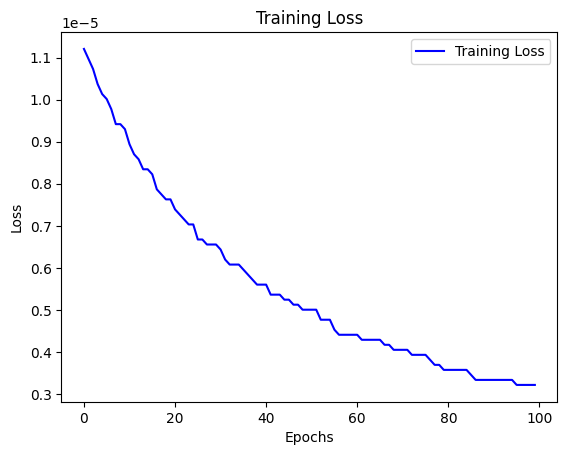

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

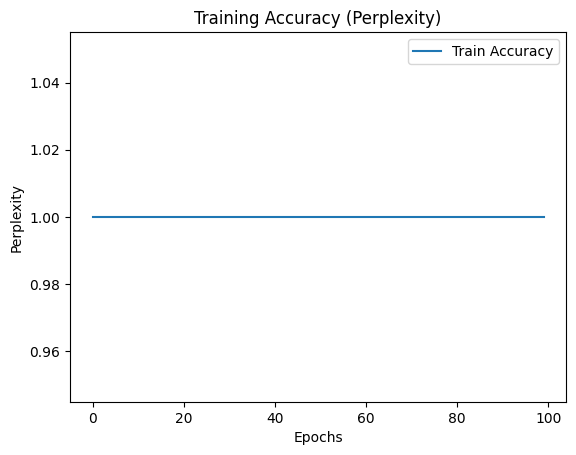

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy (Perplexity)')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.legend()